# 主成分分析及其应用
1、**主成分分析（Principal Component Analysis,PCA）**：常用的降维算法，通常用于高维数据的探索和可视化，还可用作数据压缩、预处理、综合评价等。该算法可以将具有相关性的高维变量合成为线性无关的低维变量，称其为主成分。主成分能够尽可能的保留原始数据的信息。  
2、**相关概念**

- **方差**：是各个样本和样本均值差的平方和的均值，用于度量一组数据的**离散程度**。
$$S^2 = \frac{\sum_{i = 1}^n(x_i - \bar{x})^2}{n - 1}$$

- **协方差**：用于度量两个变量间**线性相关程度**。若两个变量协方差为0，则认为二者间线性无关。协方差矩阵是由变量的协方差值构成的矩阵（对称阵）。
$$Cov(X, Y) = \frac{\sum_{i = 1}^n (X_i - \bar{x})(Y_i - \bar{Y})}{n - 1}$$

- **特征向量**：矩阵的特征向量是**描述数据集结构的非零向量**。以下公式中：A为方阵，$\vec{v}$为特征向量，$\lambda$为特征值
$$A\vec{v} = \lambda\vec{v}$$

3、**基本原理**：矩阵的主成分就是按照其协方差矩阵对应的特征向量，按照对应的特征值大小进行排序，最大的特征值即为第一主分，其次为第二主成分，以此类推。  
4、**算法过程**(周志华《机器学习》)

- **输入**：样本集$D = \{x_1, x_2, ..., x_m\}$,$x_i$表示高维数据中的各个变量
- **过程**
 - 对所有样本进行中心化（或标准化）：$x_i \leftarrow x_i - \frac{1}{m}\sum_{i = 1}^mx_i$
 - 计算样本的协方差矩阵$XX^T$
 - 对协方差矩阵$XX^T$进行特征值分解
 - 取最大的d个特征值所对应的特征向量$w_1, w_2, ..., w_d$
- **输出**：投影矩阵$W = (w_1, w_2, ..., w_d)$

# sklearn中主成分分析用法
1、**sklearn.decomposition.PCA**：在sklearn库中主要通过该方法调用主成分分析方法进行降维。  
2、**主要参数**：

- **n_components**：用于指定主成分个数，即降维后数据的维度；
- **svd_solver**：设置特征值分解的方法，默认为“auto”，其他可选包括：“full”、“arpack”、“randomized”

# 案例：鸢尾花数据集
**目标**：鸢尾花数据集包括：萼片长度、萼片宽度、花瓣长度、花瓣宽度共四个变量以及类别变量（三个类别）。对其进行降维实现二维平面的可视化。

### 1、建立工程，导入相关包

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # 从sklearn.decomposition模块中导入子模块PCA
from sklearn import datasets # 从sklearn库中导入数据集子库

### 2、加载数据并进行降维

In [17]:
# 通过设定参数return_X_y = True只返回包含变量和类别的数组
x_iris, y_iris = datasets.load_iris(return_X_y = True)

# 调用PCA方法，并设定主成分个数为2，即降维后的维度为2，特征值分解方法采用默认值
pca = PCA(n_components = 2)

# 调用PCA方法中fit_transform,利用x数据拟合模型并对x进行降维
reduce_X = pca.fit_transform(x_iris)

### 3、按类别对降维后数据进行保存

In [18]:
# 根据鸢尾花类别变量中的三个类别对降维结果进行区分，分别设定初始化空列表
# “_x”表示一个主成分；“_y”表示另一个主成分
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []

for i in range(len(reduce_X)):
    # 判断每个样本对应类别变量属于哪个类别，则将其添加到对应列表中
    if y_iris[i] == 0:
        red_x.append(reduce_X[i][0])
        red_y.append(reduce_X[i][1])
    elif y_iris[i] == 1:
        blue_x.append(reduce_X[i][0])
        blue_y.append(reduce_X[i][1])
    else:
        green_x.append(reduce_X[i][0])
        green_y.append(reduce_X[i][1])

categories = datasets.load_iris().target_names
print('y_iris[i] == 0、1、2分别对应Category为：{}、{}、{}'.format(categories[0], categories[1], categories[2]))

y_iris[i] == 0、1、2分别对应Category为：setosa、versicolor、virginica


### 4、降维后数据可视化

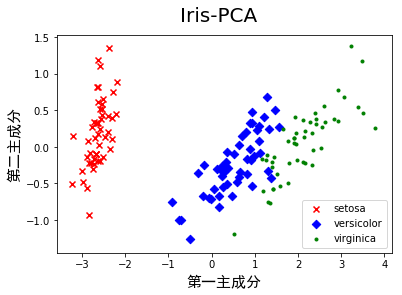

In [22]:
plt.scatter(red_x, red_y, color = 'red', marker = 'x')
plt.scatter(blue_x, blue_y, color = 'blue', marker = 'D')
plt.scatter(green_x, green_y, color = 'green', marker = '.')
plt.xlabel('第一主成分', fontproperties = 'SimHei', fontsize = 15)
plt.ylabel('第二主成分', fontproperties = 'SimHei', fontsize = 15)
# 在图像中间增加一个标题
plt.suptitle('Iris-PCA', fontsize = 20)
# 在图形中增加图例,参数loc用于表示图例在图中的位置
plt.legend([categories[0], categories[1], categories[2]], loc = 4)
plt.savefig('Iris-PCA.jpg', dpi = 600)
plt.show()